# Linhagem A549

# Importações estruturação dos dados

In [1]:
#organização dos arquivos
import os
#salvar/carregar arquivos em diferentes formatos
import joblib
#organizando os arquivos de forma aleatória
import random
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#gerar imagem
import matplotlib.image as mpimg

# Importação do modelo de CNN

In [2]:
#modelo de revisão redes neurais - cnn
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
#from keras.utils import to_categorical
from util import meus_uteis, timeProcess, mask_corr_graphic, printLis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

2022-08-05 18:43:08.789268: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-05 18:43:08.790030: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
diretorio = '/data/results/results_A549' #alimentando a variável com os arquivos da pasta datasets
lista_dados = os.listdir(diretorio) #listando os arquivos dessa pasta
printLis(lista_dados) #printando as diferentes listas

-------------
-=< Lista >=-
-------------
0 -> 10_images_de_X_test_a549_melhor_modelo_18_PACIENCE_500_2022-6-29.gz
1 -> 11_images_de_y_test_a549_melhor_modelo_18_PACIENCE%00_2022-6-29.gz
2 -> 12_lista_img_camp_clar_100_resized_regressao_A549_samehuh72021-10-25.gz
3 -> 13_lista_rotulo_camp_clar_100_resized_regressao_A549_samehuh72021-10-25.gz
4 -> 14_model__A549_regressao_maior_erro_18_PACIEN_500_2022-6-29.h5
5 -> 15_images_de_X_test_a549_pior_modelo_18_PACIENCE_500_2022-6-29.gz
6 -> 16_images_de_y_test_a549_pior_modelo_18_PACIENCE_500_2022-6-29.gz
7 -> 1_lista_img_camp_clar_100_resized_regressao_A5492021-11-9.gz
8 -> 2_lista_img_camp_clar_75_resized_regressao_A5492021-11-9.gz
9 -> 3_lista_img_camp_clar_50_resized_regressao_A5492021-11-9.gz
10 -> 4_lista_img_camp_clar_25_resized_regressao_A5492021-11-9.gz
11 -> 5_lista_rotulo_camp_clar_100_resized_regressao_A5492021-11-9.gz
12 -> 6_lista_rotulo_camp_clar_75_resized_regressao_A5492021-11-9.gz
13 -> 7_lista_rotulo_camp_clar_50_resized_reg

In [4]:
#lista sameHuh7 A549
imagem_camp_claro = joblib.load(diretorio+ '/' + lista_dados[2]) #atualizar
imagem_camp_claro.shape #apresentando 4000 imagens de 108x108, 3 rgb

(176, 200, 200, 3)

## x = características/imagens

In [5]:
#somando cada lista gerada acima e salvando em um array
x = np.asarray(imagem_camp_claro) #abriando em array as imagens
x.shape #x - características (labels) 

(176, 200, 200, 3)

## y = rótulos

Abrindo os rótulos que foram salvos na preparação das imagens

In [6]:
#rotulo samehuh7 A549
y_rotulo = joblib.load(diretorio+ '/' + lista_dados[3]) #atualizar #carregando os rotulos
y = np.asarray(y_rotulo)
y.shape

(176,)

In [ ]:
#Train and test split datasets for CNN model
#função que separa as imagens em teste e treino
from sklearn.model_selection import train_test_split

Separação de teste e treino a partir de uma biblioteca.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
#variáveis recebem o número de imagens para tes e treino
print(f'{X_train.shape} \n{X_test.shape} \n{y_train.shape} \n{y_test.shape}')

(170, 200, 200, 3) 
(114, 200, 200, 3) 
(170,) 
(114,)


In [ ]:
#data = timeProcess()[1]


In [ ]:
#joblib.dump(X_train, './../../results/1_images_de_X_train_a549_pior_modelo_18_PACIENCE_500_'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//1_images_de_X_train_a549_pior_modelo_18_PACIENCE_500_2022-6-29.gz']

In [ ]:
#joblib.dump(y_train, './../../results/1_images_de_y_train_a549_pior_modelo_18_PACIENCE_500_'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//1_images_de_y_train_a549_pior_modelo_18_PACIENCE_500_2022-6-29.gz']

In [ ]:
#joblib.dump(X_test, './../../results/2_images_de_X_test_a549_pior_modelo_18_PACIENCE_500_'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//2_images_de_X_test_a549_pior_modelo_18_PACIENCE_500_2022-6-29.gz']

In [ ]:
#joblib.dump(y_test, './../../results/2_images_de_y_test_a549_pior_modelo_18_PACIENCE_500_'+data+'.gz')


['/content/drive/MyDrive/1_Informações_scripts//2_images_de_y_test_a549_pior_modelo_18_PACIENCE_500_2022-6-29.gz']

Para treinar o modelo, geralmente é selecionada 30% das imagens para o treino e 70% para teste. Para isso, as imagens são guardadas em uma variável de teste (somente 30%) e o restante vai para o treino.

### Determinação do modelo

In [ ]:
modelo = Sequential()
modelo.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
#função de ativação relu é muito utilizado para problemas de regressão
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(64, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(128, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(256, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Flatten())
modelo.add(Dropout(0.9))
modelo.add(Dense(1, activation='linear'))
#apenas uma saída e de forma linear
modelo.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
print(modelo.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 23, 23, 128)     

Após correr o modelo de Redes Neurais, vamos treina-lo em algumas rodadas e verificar a acurácia.

Guardando&nbsp;em&nbsp;uma&nbsp;variável&nbsp;o&nbsp;treinamento&nbsp;do&nbsp;modelo&nbsp;-&nbsp;informando&nbsp;as&nbsp;imagens&nbsp;com&nbsp;as&nbsp;caracteristicas (X_treino) e junto a elas os rótulos, validando com os valores de teste em 10 rodadas

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=18)

In [ ]:
# fit model
history = modelo.fit(X_train,y_train,
                    validation_data=(X_test, y_test), 
                    epochs=500, verbose=2, 
                    callbacks=[es]
                     )

Epoch 1/500
6/6 - 1s - loss: 349994.1250 - mean_squared_error: 349994.1250 - val_loss: 66802.1250 - val_mean_squared_error: 66802.1250 - 1s/epoch - 171ms/step
Epoch 2/500
6/6 - 0s - loss: 73270.3750 - mean_squared_error: 73270.3750 - val_loss: 47794.7734 - val_mean_squared_error: 47794.7734 - 380ms/epoch - 63ms/step
Epoch 3/500
6/6 - 0s - loss: 57056.9102 - mean_squared_error: 57056.9102 - val_loss: 48031.1797 - val_mean_squared_error: 48031.1797 - 302ms/epoch - 50ms/step
Epoch 4/500
6/6 - 0s - loss: 58749.9219 - mean_squared_error: 58749.9219 - val_loss: 37655.9609 - val_mean_squared_error: 37655.9609 - 302ms/epoch - 50ms/step
Epoch 5/500
6/6 - 0s - loss: 60832.6484 - mean_squared_error: 60832.6484 - val_loss: 38630.4570 - val_mean_squared_error: 38630.4570 - 308ms/epoch - 51ms/step
Epoch 6/500
6/6 - 0s - loss: 59406.4297 - mean_squared_error: 59406.4297 - val_loss: 43625.5664 - val_mean_squared_error: 43625.5664 - 384ms/epoch - 64ms/step
Epoch 7/500
6/6 - 0s - loss: 53722.2344 - mean

In [ ]:
# #rodadas de treinamento
# history = modelo.fit(
#                         X_train,
#                         y_train,
#                         validation_data=(X_test, y_test),
#                         epochs=50,
#                         batch_size=12
#                     )

In [ ]:
# #salvando o modelo
#modelo.save('./../../results/model__A549_regressao_MAIOR_ERRO_18_PACIEN_500_'+data+'.h5')

## Avaliação da Acurácia

Existem algumas maneiras de se avaliar a acurácia dos algoritmos, para algoritmo de regressão, as métricas mais comuns são Erro médio absoluto (MSE) não se baseia na média a partir de valores discrepantes. Erro Médio quadrático (MAE) considera os valores discrepantes entre as variáveis, apontando maior erro.

O algoritmo avalia o valor previsto e subtraí pelo valor conhecido, depois é calculado a média entre cada valor.

In [ ]:
# #salvando o modelo
# data = timeProcess()[1]
# modelo.save('arquivos_text_modelo_imagens//model_camp_claro_A549_regressao'+data+'.h5')

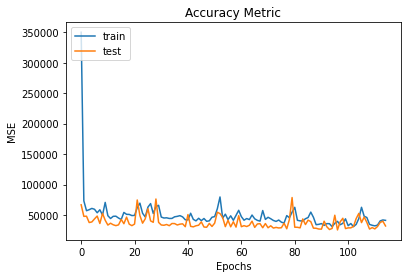

In [ ]:
#gráfico avaliando a acurácia a partir de treino e teste
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Accuracy Metric')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.savefig(
    fname="/results/CNN_A549_Greatest_error.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

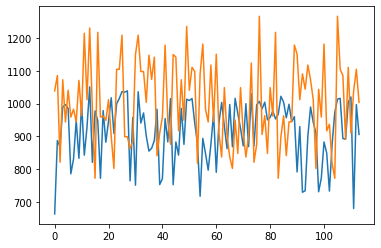

In [ ]:
#avaliando a previsão do modelo com os rótulos
prev = modelo.predict(X_test)
plt.plot(prev)
plt.plot(y_test)
plt.show()

In [ ]:
# Qualit model analisys
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error

In [ ]:
#buscando pelas métricas
print(f"{round(r2_score(y_test, prev) * 100, 2)}% r2_score") #raíz quadrada
print(f"{round(mean_absolute_error(y_test, prev), 2)} Erro médio absoluto") 
print(f"{round(mean_squared_error(y_test, prev), 2)} Erro médio quadrático")
# print(f"{round(median_absolute_error(y_test, prev), 2)}")#Erro médio absoluto sem %



-103.11% r2_score
148.86 Erro médio absoluto
32017.55 Erro médio quadrático


In [ ]:
mean_absolute_error(y_test, prev)

193.85687255859375

In [ ]:
print(f"{round(mean_absolute_error(y_test, prev), 2)}") #erro médio absoluto


193.86


In [ ]:
print(f"{round(mean_squared_log_error(y_test, prev), 2)}") #erro médio quadrático


0.06
